# Cleaning


### My research questions

Befor we start cleaning the data, we establish our research questions to know what we want to get out of the data. So the following research questions were established:

**Supervised learning**

Main research question - "How can we predict worldwide box office of movies based on their various attributes?“

•	Which model (NN, KNN, RF) works best for predicting worldwide box office?

•	How does genre predict worldwide box office performance of movies?

•	How does runtime predict worldwide box office performance of movies?

•	How does theatre count predict worldwide box office of movies?

•	How does avg run per theatre predict worldwide box office of movies?

•	How does creative type predict worldwide box office of movies?

•	How does a season of release predict worldwide box office of movies?



**Unsupervised learning**

Main research question - "What type of movie clusters are most successful for studios to make?"

•	What type of movie clusters are most attractive for theaters to widely release the film?

•	What type of movie clusters are most attractive for theaters to keep it running for longer?

•	How does a length of a movie influence overall worldwide box office within clusters?

•	How does season of release influence overall worldwide box office within clusters?

•	How does creative type influence overall worldwide box office within clusters?

•	Which model (K-means, DBSCAN) works best?


Relevance for our study - Forecasting box-office receipts remains a challenging task, often seen as unpredictable due to the inherent uncertainty in predicting product demand (Sharda & Delen, 2006). This unpredictability underscores the movie business's status as one of the riskiest ventures for investors, as noted by industry figures and trade journals (Sharda & Delen, 2006)


Reference: Sharda, R., & Delen, D. (2006). Predicting box-office success of motion pictures with neural networks. Expert Systems with Applications, 30(2), 243-254.

It is also necessary to mention that the preliminary research questions differed a bit and over the course of working with the data and running the models the questions were adjusted to look like they are now. 

In [1]:
import pandas as pd
import numpy as np

### Merging the sales and metacritic dataframes

In [2]:
#Reading the metacritic CSV file and loading its constents into the DataFrame
meta_df = pd.read_csv(r"C:\Users\ottok\Downloads\Metaclean_AI.csv")
meta_df.head()

,url,title,studio,rating,runtime,cast,director,genre,summary,awards,metascore,userscore,RelDate
0,https://www.metacritic.com/movie/!women-art-re...,!Women Art Revolution,Hotwire Productions,| Not Rated,83.0,NaN,Lynn Hershman-Leeson,Documentary,NaN,NaN,70,NaN,6/1/2011
1,https://www.metacritic.com/movie/10-cloverfiel...,10 Cloverfield Lane,Paramount Pictures,| PG-13,104.0,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror","Waking up from a car accident, a young woman (...","#18MostDiscussedMovieof2016 , #1MostSharedMovi...",76,7.7,3/11/2016
2,https://www.metacritic.com/movie/10-items-or-less,10 Items or Less,Click Star,| R,82.0,"Jonah Hill,Morgan Freeman,Paz Vega",Brad Silberling,"Drama,Comedy,Romance",While researching a role as a supermarket mana...,NaN,54,5.8,12/1/2006
3,https://www.metacritic.com/movie/10-years,10 Years,Anchor Bay Entertainment,| R,100.0,"Channing Tatum,Chris Pratt,Jenna Dewan",Jamie Linden,"Drama,Comedy,Romance",NaN,NaN,61,6.9,9/14/2012
4,https://www.metacritic.com/movie/100-bloody-acres,100 Bloody Acres,Music Box Films,| Not Rated,91.0,NaN,Cameron Cairnes,"Horror,Comedy",Reg and Lindsay run an organic fertilizer busi...,NaN,63,7.5,6/28/2013


In [3]:
#Reading the metacritic CSV file and loading its constents into the DataFrame
sales_df = pd.read_csv(r"C:\Users\ottok\Downloads\Sales_AI.csv")
sales_df.head()

,year,release_date,title,genre,international_box_office,domestic_box_office,worldwide_box_office,production_budget,Unnamed: 8,opening_weekend,theatre_count,avg run per theatre,runtime,keywords,creative_type,url
0,2000,January 1st,Bakha Satang,Drama,76576.0,NaN,76576.0,NaN,NaN,NaN,NaN,NaN,129.0,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Bakha-Satang...
1,2001,January 12th,Antitrust,Thriller/Suspense,6900000.0,10965209.0,17865209.0,30000000.0,NaN,5486209.0,2433.0,3.1,NaN,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Antitrust
2,2000,January 28th,Santitos,NaN,NaN,378562.0,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,https://www.the-numbers.com/movie/Santitos
3,2002,2002 (Wide) by,Frank McKlusky C.I.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.the-numbers.com/movie/Frank-McKlus...
4,2002,January 25th,A Walk to Remember,Drama,4833792.0,41227069.0,46060861.0,11000000.0,NaN,12177488.0,2411.0,5.3,NaN,Coming of Age,Contemporary Fiction,https://www.the-numbers.com/movie/Walk-to-Reme...


In [4]:
#Merging the sales and metacritic dataset on title
merged_df = pd.merge(meta_df, sales_df, on='title')
print(merged_df)


                                                  url_x                title  \
0     https://www.metacritic.com/movie/10-cloverfiel...  10 Cloverfield Lane   
1             https://www.metacritic.com/movie/10-years             10 Years   
2     https://www.metacritic.com/movie/100-bloody-acres     100 Bloody Acres   
3          https://www.metacritic.com/movie/100-streets          100 Streets   
4           https://www.metacritic.com/movie/1001-grams           1001 Grams   
...                                                 ...                  ...   
8985              https://www.metacritic.com/movie/zoom                 Zoom   
8986              https://www.metacritic.com/movie/zoom                 Zoom   
8987         https://www.metacritic.com/movie/zoom-2016                 Zoom   
8988         https://www.metacritic.com/movie/zoom-2016                 Zoom   
8989          https://www.metacritic.com/movie/zootopia             Zootopia   

                                   stud

In [5]:
print("There are {} rows and {} columns in the dataset".format(merged_df.shape[0], merged_df.shape[1]))

There are 8990 rows and 28 columns in the dataset


In [6]:
#Seeing the merged columns
merged_df.columns


Index(['url_x', 'title', 'studio', 'rating', 'runtime_x', 'cast', 'director',
       'genre_x', 'summary', 'awards', 'metascore', 'userscore', 'RelDate',
       'year', 'release_date', 'genre_y', 'international_box_office',
       'domestic_box_office', 'worldwide_box_office', 'production_budget',
       'Unnamed: 8', 'opening_weekend', 'theatre_count', 'avg run per theatre',
       'runtime_y', 'keywords', 'creative_type', 'url_y'],
      dtype='object')

In [7]:
#Dropping unnnecessary columns
merged_df.drop(['url_x','title', 'studio', 'cast','director', 'genre_x', 'summary','awards','year', 'release_date','international_box_office','domestic_box_office', 'Unnamed: 8', 'runtime_y', 'keywords', 'url_y'], axis=1, inplace=True)


Reasoning why dropping colums. E-g why decided on genre_y. Wht eventually dropped studio etc

In [8]:
#Renaming certain columns
merged_df.rename(columns={ 'runtime_x': 'runtime', 'genre_y': 'genre', 'avg run per theatre': 'avg_run_per_theatre'}, inplace=True)

merged_df

,rating,runtime,metascore,userscore,RelDate,genre,worldwide_box_office,production_budget,opening_weekend,theatre_count,avg_run_per_theatre,creative_type
0,| PG-13,104.0,76,7.7,3/11/2016,Thriller/Suspense,1.082864e+08,15000000.0,24727437.0,3391.0,4.9,Contemporary Fiction
1,| R,100.0,61,6.9,9/14/2012,Drama,9.876400e+05,NaN,22707.0,3.0,2.1,Contemporary Fiction
2,| Not Rated,91.0,63,7.5,6/28/2013,Black Comedy,NaN,NaN,3419.0,13.0,1.5,Contemporary Fiction
3,NaN,93.0,44,6.1,1/13/2017,Drama,3.070000e+02,NaN,NaN,NaN,NaN,Contemporary Fiction
4,| Not Rated,93.0,65,NaN,5/8/2015,Drama,4.701900e+04,NaN,NaN,NaN,NaN,Contemporary Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...
8985,| PG,83.0,26,4.4,8/11/2006,Adventure,2.784000e+03,NaN,NaN,NaN,NaN,Contemporary Fiction
8986,| PG,83.0,26,4.4,8/11/2006,Adventure,1.250619e+07,35000000.0,4510408.0,2501.0,2.6,Super Hero
8987,| Not Rated,96.0,55,5.7,9/2/2016,Adventure,2.784000e+03,NaN,NaN,NaN,NaN,Contemporary Fiction
8988,| Not Rated,96.0,55,5.7,9/2/2016,Adventure,1.250619e+07,35000000.0,4510408.0,2501.0,2.6,Super Hero


In [9]:
#Looking at data types
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8990 entries, 0 to 8989
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rating                8357 non-null   object 
 1   runtime               8815 non-null   float64
 2   metascore             8990 non-null   int64  
 3   userscore             7586 non-null   float64
 4   RelDate               8990 non-null   object 
 5   genre                 8601 non-null   object 
 6   worldwide_box_office  5824 non-null   float64
 7   production_budget     3672 non-null   float64
 8   opening_weekend       7009 non-null   float64
 9   theatre_count         7027 non-null   float64
 10  avg_run_per_theatre   7023 non-null   float64
 11  creative_type         8253 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 913.0+ KB


In [10]:
#Replace commas with periods in the selected columns
columns_to_replace = [ 'worldwide_box_office', 'production_budget', 'avg_run_per_theatre']
merged_df[columns_to_replace] = merged_df[columns_to_replace].astype(str).apply(lambda x: x.str.replace(',', '.'))
merged_df

,rating,runtime,metascore,userscore,RelDate,genre,worldwide_box_office,production_budget,opening_weekend,theatre_count,avg_run_per_theatre,creative_type
0,| PG-13,104.0,76,7.7,3/11/2016,Thriller/Suspense,108286422.0,15000000.0,24727437.0,3391.0,4.9,Contemporary Fiction
1,| R,100.0,61,6.9,9/14/2012,Drama,987640.0,nan,22707.0,3.0,2.1,Contemporary Fiction
2,| Not Rated,91.0,63,7.5,6/28/2013,Black Comedy,nan,nan,3419.0,13.0,1.5,Contemporary Fiction
3,NaN,93.0,44,6.1,1/13/2017,Drama,307.0,nan,NaN,NaN,nan,Contemporary Fiction
4,| Not Rated,93.0,65,NaN,5/8/2015,Drama,47019.0,nan,NaN,NaN,nan,Contemporary Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...
8985,| PG,83.0,26,4.4,8/11/2006,Adventure,2784.0,nan,NaN,NaN,nan,Contemporary Fiction
8986,| PG,83.0,26,4.4,8/11/2006,Adventure,12506188.0,35000000.0,4510408.0,2501.0,2.6,Super Hero
8987,| Not Rated,96.0,55,5.7,9/2/2016,Adventure,2784.0,nan,NaN,NaN,nan,Contemporary Fiction
8988,| Not Rated,96.0,55,5.7,9/2/2016,Adventure,12506188.0,35000000.0,4510408.0,2501.0,2.6,Super Hero


In [11]:
#Seeing unique genres
unique_genres = merged_df['genre'].unique()
print("Unique genres:")
print(unique_genres)


Unique genres:
['Thriller/Suspense' 'Drama' 'Black Comedy' 'Adventure' 'Action' 'Horror'
 'Documentary' 'Comedy' 'Romantic Comedy' nan 'Western' 'Musical'
 'Concert/Performance' 'Multiple Genres']


In [12]:
#Splitting the genre column and keeping the first option only
merged_df['genre'] = merged_df['genre'].str.split('/').str[0]
merged_df


,rating,runtime,metascore,userscore,RelDate,genre,worldwide_box_office,production_budget,opening_weekend,theatre_count,avg_run_per_theatre,creative_type
0,| PG-13,104.0,76,7.7,3/11/2016,Thriller,108286422.0,15000000.0,24727437.0,3391.0,4.9,Contemporary Fiction
1,| R,100.0,61,6.9,9/14/2012,Drama,987640.0,nan,22707.0,3.0,2.1,Contemporary Fiction
2,| Not Rated,91.0,63,7.5,6/28/2013,Black Comedy,nan,nan,3419.0,13.0,1.5,Contemporary Fiction
3,NaN,93.0,44,6.1,1/13/2017,Drama,307.0,nan,NaN,NaN,nan,Contemporary Fiction
4,| Not Rated,93.0,65,NaN,5/8/2015,Drama,47019.0,nan,NaN,NaN,nan,Contemporary Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...
8985,| PG,83.0,26,4.4,8/11/2006,Adventure,2784.0,nan,NaN,NaN,nan,Contemporary Fiction
8986,| PG,83.0,26,4.4,8/11/2006,Adventure,12506188.0,35000000.0,4510408.0,2501.0,2.6,Super Hero
8987,| Not Rated,96.0,55,5.7,9/2/2016,Adventure,2784.0,nan,NaN,NaN,nan,Contemporary Fiction
8988,| Not Rated,96.0,55,5.7,9/2/2016,Adventure,12506188.0,35000000.0,4510408.0,2501.0,2.6,Super Hero


In [13]:
#Removing the | sign from the rating column
merged_df['rating'] = merged_df['rating'].str.replace('|', '')


C:\Users\ottok\AppData\Local\Temp\ipykernel_16792\1782394717.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df['rating'] = merged_df['rating'].str.replace('|', '')


In [14]:
#Checking for duplicates
duplicates = merged_df.duplicated()
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 1


In [15]:
#Dropping duplicates
merged_df.drop_duplicates(inplace=True)

In [16]:
#Transforming the written 'nan' in columns to null values, otherwise it did not recognize some of the 'nan' values instead of 'NaN'
merged_df.replace(to_replace='nan', value=np.nan, inplace=True)


### Null values


Unsupervised learning methods such as clustering and dimensionality reduction depend on uncovering inherent patterns and relationships within the data. The absence of values can distort these patterns, potentially resulting in inaccurate groupings or representations.

Furthermore, many unsupervised learning algorithms, like k-means clustering and hierarchical clustering, rely on distance metrics or similarity measures between data points. The presence of missing values can disrupt these calculations, impacting the overall effectiveness of these algorithms.

Addressing missing values in unsupervised machine learning often involves common strategies such as imputation (substituting missing values with estimated ones), eliminating instances or features containing missing values, or utilizing algorithms capable of handling missing values directly. Our focus lies on imputation and the removal of instances with NaN values.

In [17]:
#Checking for null values
null_values = merged_df.isnull().sum()
print(null_values)

rating                   633
runtime                  175
metascore                  0
userscore               1404
RelDate                    0
genre                    389
worldwide_box_office    3165
production_budget       5317
opening_weekend         1980
theatre_count           1962
avg_run_per_theatre     1966
creative_type            737
dtype: int64


We drop the Production budget column because over 50% null values, and we drop from our predictor worldwide box office all rows with null values because 3165 is still too much of a subtsantial amount of the whole dataset to impute those values.

In [18]:
# Drop the 'production_budget' column
merged_df.drop('production_budget', axis=1, inplace=True)

In [19]:
#Dropping the rows with null values in the worldwide box office column
merged_df.dropna(subset=['worldwide_box_office'], inplace=True)


In [20]:
null_values_count = merged_df['worldwide_box_office'].isnull().sum()
print("Count of null values in the 'worldwide_box_office' column:", null_values_count)


Count of null values in the 'worldwide_box_office' column: 0


Genre, rating and creative type are categorical variables that is why we will use mode to fill the missing values

In [21]:

# Calculating the average value for 'genre', 'rating', and 'creative_type' columns
genre_avg = merged_df['genre'].mode()[0]
rating_avg = merged_df['rating'].mode()[0]
creative_avg = merged_df['creative_type'].mode()[0]

# Replace null values in 'genre' column with the average value
merged_df['genre'].fillna(genre_avg, inplace=True)

# Replace null values in 'rating' column with the average value
merged_df['rating'].fillna(rating_avg, inplace=True)

# Replace null values in 'creative_type' column with the average value
merged_df['creative_type'].fillna(creative_avg, inplace=True)

# Display the updated dataframe
merged_df.head()


,rating,runtime,metascore,userscore,RelDate,genre,worldwide_box_office,opening_weekend,theatre_count,avg_run_per_theatre,creative_type
0,PG-13,104.0,76,7.7,3/11/2016,Thriller,108286422.0,24727437.0,3391.0,4.9,Contemporary Fiction
1,R,100.0,61,6.9,9/14/2012,Drama,987640.0,22707.0,3.0,2.1,Contemporary Fiction
3,R,93.0,44,6.1,1/13/2017,Drama,307.0,NaN,NaN,NaN,Contemporary Fiction
4,Not Rated,93.0,65,NaN,5/8/2015,Drama,47019.0,NaN,NaN,NaN,Contemporary Fiction
6,R,107.0,36,6.7,8/18/2006,Drama,143782.0,20774.0,6.0,3.8,Dramatization


In [22]:
#Checking if it worked
null_rating_count = merged_df['rating'].isnull().sum()
null_creative_type_count = merged_df['creative_type'].isnull().sum()
null_genre_count = merged_df['genre'].isnull().sum()

print("Count of null values in the column 'rating':", null_rating_count)
print("Count of null values in the column 'creative_type':", null_creative_type_count)
print("Count of null values in the column 'genre':", null_genre_count)


Count of null values in the column 'rating': 0
Count of null values in the column 'creative_type': 0
Count of null values in the column 'genre': 0


Now we check how other variables with null values are distributed so we know if they need to be imputed with a mean or a median

<Axes: >

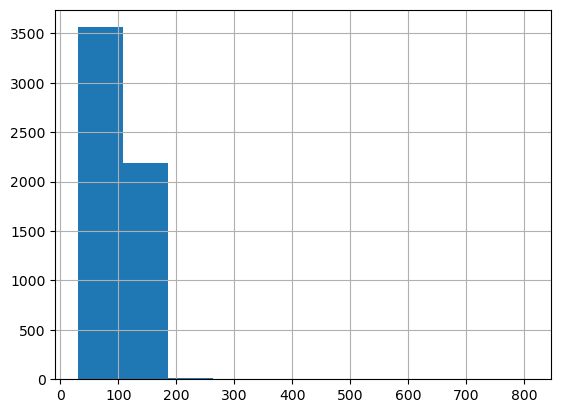

In [23]:
#Disribution of the runtime
merged_df['runtime'].hist()

<Axes: >

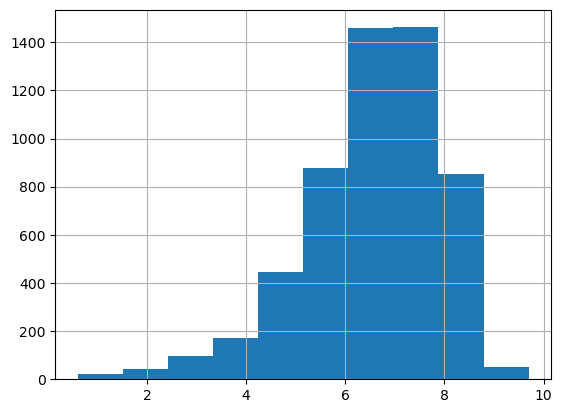

In [24]:
#Disribution of the userscore
merged_df['userscore'].hist()

<Axes: >

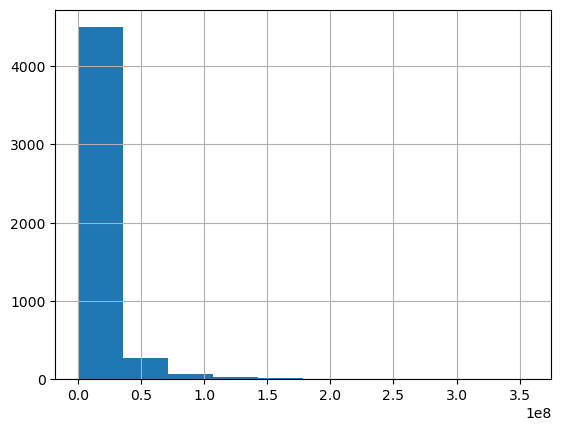

In [25]:
#Disribution of the opening weekend
merged_df['opening_weekend'].hist()

<Axes: >

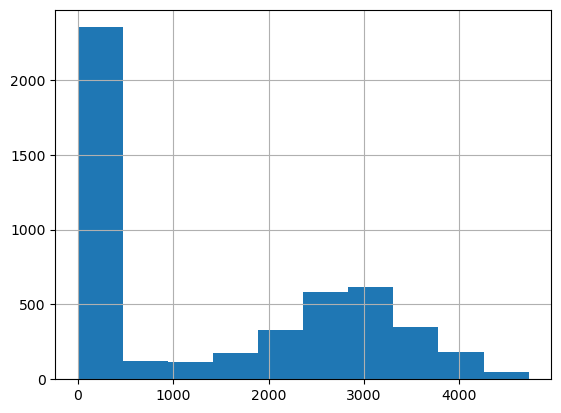

In [26]:
#Disribution of theatre count
merged_df['theatre_count'].hist()

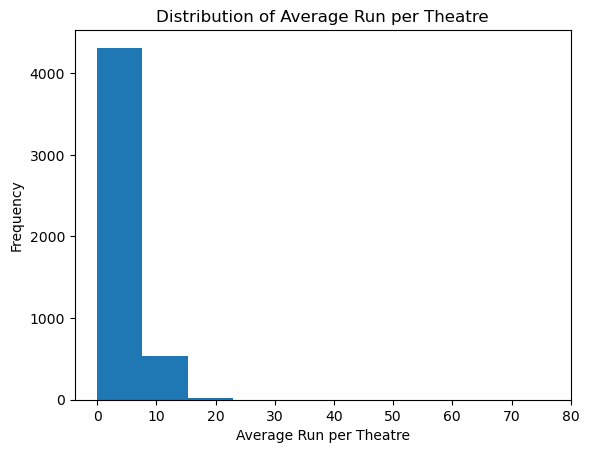

In [27]:
import matplotlib.pyplot as plt

# Converting 'avg_run_per_theatre' column to numeric
merged_df['avg_run_per_theatre'] = pd.to_numeric(merged_df['avg_run_per_theatre'], errors='coerce')

# Plotting the histogram
plt.hist(merged_df['avg_run_per_theatre'], bins=10)
plt.xlabel('Average Run per Theatre')
plt.ylabel('Frequency')
plt.title('Distribution of Average Run per Theatre')
plt.show()


For all of the features we use median in imputing because it is less sensitive to outliers than the mean and none of the features have normal distributions.  

In [28]:
# Impute null values in the 'userscore' column with the median value
merged_df['userscore'].fillna(merged_df['userscore'].median(), inplace=True)

# Impute null values in the 'runtime' column with the median value
merged_df['runtime'].fillna(merged_df['runtime'].median(), inplace=True)

# Impute null values in the 'opening_weekend' column with the median value
merged_df['opening_weekend'].fillna(merged_df['opening_weekend'].median(), inplace=True)

# Impute null values in the 'theatre_count' column with the median value
merged_df['theatre_count'].fillna(merged_df['theatre_count'].median(), inplace=True)

# Impute null values in the 'avg_run_per_theatre' column with the median value
merged_df['avg_run_per_theatre'].fillna(merged_df['avg_run_per_theatre'].median(), inplace=True)



In [29]:
#Checking for null values
null_values = merged_df.isnull().sum()
print(null_values)

rating                  0
runtime                 0
metascore               0
userscore               0
RelDate                 0
genre                   0
worldwide_box_office    0
opening_weekend         0
theatre_count           0
avg_run_per_theatre     0
creative_type           0
dtype: int64


Splitting release date into year, month and day

In [30]:
import dateutil.parser as parser

#Function to change date to a different format
def parse_date(date_str):
    try:
        return parser.parse(date_str)
    except:
        return None

# Convert RelDate column to datetime and inserting parse_date-function
merged_df['RelDate'] = merged_df['RelDate'].apply(parse_date)
merged_df

,rating,runtime,metascore,userscore,RelDate,genre,worldwide_box_office,opening_weekend,theatre_count,avg_run_per_theatre,creative_type
0,PG-13,104.0,76,7.7,2016-03-11,Thriller,108286422.0,24727437.0,3391.0,4.9,Contemporary Fiction
1,R,100.0,61,6.9,2012-09-14,Drama,987640.0,22707.0,3.0,2.1,Contemporary Fiction
3,R,93.0,44,6.1,2017-01-13,Drama,307.0,1701785.0,819.5,4.2,Contemporary Fiction
4,Not Rated,93.0,65,6.7,2015-05-08,Drama,47019.0,1701785.0,819.5,4.2,Contemporary Fiction
6,R,107.0,36,6.7,2006-08-18,Drama,143782.0,20774.0,6.0,3.8,Dramatization
...,...,...,...,...,...,...,...,...,...,...,...
8985,PG,83.0,26,4.4,2006-08-11,Adventure,2784.0,1701785.0,819.5,4.2,Contemporary Fiction
8986,PG,83.0,26,4.4,2006-08-11,Adventure,12506188.0,4510408.0,2501.0,2.6,Super Hero
8987,Not Rated,96.0,55,5.7,2016-09-02,Adventure,2784.0,1701785.0,819.5,4.2,Contemporary Fiction
8988,Not Rated,96.0,55,5.7,2016-09-02,Adventure,12506188.0,4510408.0,2501.0,2.6,Super Hero


In [31]:
# Separate the release date column into year, month, and date
merged_df['year'] = merged_df['RelDate'].dt.year
merged_df['month'] = merged_df['RelDate'].dt.month
merged_df['day'] = merged_df['RelDate'].dt.day

# Display the updated dataframe
merged_df.head()


,rating,runtime,metascore,userscore,RelDate,genre,worldwide_box_office,opening_weekend,theatre_count,avg_run_per_theatre,creative_type,year,month,day
0,PG-13,104.0,76,7.7,2016-03-11,Thriller,108286422.0,24727437.0,3391.0,4.9,Contemporary Fiction,2016,3,11
1,R,100.0,61,6.9,2012-09-14,Drama,987640.0,22707.0,3.0,2.1,Contemporary Fiction,2012,9,14
3,R,93.0,44,6.1,2017-01-13,Drama,307.0,1701785.0,819.5,4.2,Contemporary Fiction,2017,1,13
4,Not Rated,93.0,65,6.7,2015-05-08,Drama,47019.0,1701785.0,819.5,4.2,Contemporary Fiction,2015,5,8
6,R,107.0,36,6.7,2006-08-18,Drama,143782.0,20774.0,6.0,3.8,Dramatization,2006,8,18


### Now we want to recode genre, rating, and creative type to numerical values for the models.

In [32]:
# Mapping genres
genre_mapping = pd.factorize(merged_df['genre'])
genre_mapping_df = pd.DataFrame({'Genre': merged_df['genre'], 'Genre_ID': genre_mapping[0] + 1})

# Replace the genre column items with the corresponding genre ID
merged_df['genre'] = genre_mapping[0] + 1


In [33]:
unique_genres = genre_mapping_df['Genre'].unique()
print("Unique genres:")
print(unique_genres)

print("\nMapping of genres to their IDs:")
print(genre_mapping_df)


Unique genres:
['Thriller' 'Drama' 'Action' 'Horror' 'Documentary' 'Comedy'
 'Romantic Comedy' 'Black Comedy' 'Western' 'Adventure' 'Musical'
 'Multiple Genres' 'Concert']

Mapping of genres to their IDs:
          Genre  Genre_ID
0      Thriller         1
1         Drama         2
3         Drama         2
4         Drama         2
6         Drama         2
...         ...       ...
8985  Adventure        10
8986  Adventure        10
8987  Adventure        10
8988  Adventure        10
8989  Adventure        10

[5824 rows x 2 columns]


In [34]:
# Mapping ratings
rating_mapping = pd.factorize(merged_df['rating'])
rating_mapping_df = pd.DataFrame({'Rating': merged_df['rating'], 'Rating_ID': rating_mapping[0] + 1})

# Replace the rating column items with the corresponding rating ID
merged_df['rating'] = rating_mapping[0] + 1


In [35]:
unique_ratings = rating_mapping_df['Rating'].unique()
print("Unique rating types:")
print(unique_ratings)

print("\nMapping of rating types to their IDs:")
print(rating_mapping_df)


Unique rating types:
[' PG-13' ' R' ' Not Rated' ' TV-MA' ' Unrated' ' PG' ' NR' ' G' ' NC-17'
 ' MA-17' ' TV-PG' ' TV-14' ' TV-G' ' PG--13' ' Approved' ' Open']

Mapping of rating types to their IDs:
          Rating  Rating_ID
0          PG-13          1
1              R          2
3              R          2
4      Not Rated          3
6              R          2
...          ...        ...
8985          PG          6
8986          PG          6
8987   Not Rated          3
8988   Not Rated          3
8989          PG          6

[5824 rows x 2 columns]


In [36]:
# Mapping creative types
creative_mapping = pd.factorize(merged_df['creative_type'])
creative_mapping_df = pd.DataFrame({'Creative_Type': merged_df['creative_type'], 'Creative_Type_ID': creative_mapping[0] + 1})

# Replace the creative_type column items with the corresponding creative_type ID
merged_df['creative_type'] = creative_mapping[0] + 1



In [37]:
unique_creative_types = creative_mapping_df['Creative_Type'].unique()
print("Unique creative types:")
print(unique_creative_types)

print("\nMapping of creative types to their IDs:")
print(creative_mapping_df)


Unique creative types:
['Contemporary Fiction' 'Dramatization' 'Historical Fiction' 'Factual'
 'Science Fiction' 'Fantasy' 'Kids Fiction' 'Multiple Creative Types'
 'Super Hero']

Mapping of creative types to their IDs:
             Creative_Type  Creative_Type_ID
0     Contemporary Fiction                 1
1     Contemporary Fiction                 1
3     Contemporary Fiction                 1
4     Contemporary Fiction                 1
6            Dramatization                 2
...                    ...               ...
8985  Contemporary Fiction                 1
8986            Super Hero                 9
8987  Contemporary Fiction                 1
8988            Super Hero                 9
8989          Kids Fiction                 7

[5824 rows x 2 columns]


In [38]:
merged_df

,rating,runtime,metascore,userscore,RelDate,genre,worldwide_box_office,opening_weekend,theatre_count,avg_run_per_theatre,creative_type,year,month,day
0,1,104.0,76,7.7,2016-03-11,1,108286422.0,24727437.0,3391.0,4.9,1,2016,3,11
1,2,100.0,61,6.9,2012-09-14,2,987640.0,22707.0,3.0,2.1,1,2012,9,14
3,2,93.0,44,6.1,2017-01-13,2,307.0,1701785.0,819.5,4.2,1,2017,1,13
4,3,93.0,65,6.7,2015-05-08,2,47019.0,1701785.0,819.5,4.2,1,2015,5,8
6,2,107.0,36,6.7,2006-08-18,2,143782.0,20774.0,6.0,3.8,2,2006,8,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,6,83.0,26,4.4,2006-08-11,10,2784.0,1701785.0,819.5,4.2,1,2006,8,11
8986,6,83.0,26,4.4,2006-08-11,10,12506188.0,4510408.0,2501.0,2.6,9,2006,8,11
8987,3,96.0,55,5.7,2016-09-02,10,2784.0,1701785.0,819.5,4.2,1,2016,9,2
8988,3,96.0,55,5.7,2016-09-02,10,12506188.0,4510408.0,2501.0,2.6,9,2016,9,2


In [39]:
# Dropping the 'RelDate', 'year' and 'day' columns beacuse we will not use them
merged_df.drop([ 'RelDate', 'year', 'day'], axis=1, inplace=True)
merged_df.head()


,rating,runtime,metascore,userscore,genre,worldwide_box_office,opening_weekend,theatre_count,avg_run_per_theatre,creative_type,month
0,1,104.0,76,7.7,1,108286422.0,24727437.0,3391.0,4.9,1,3
1,2,100.0,61,6.9,2,987640.0,22707.0,3.0,2.1,1,9
3,2,93.0,44,6.1,2,307.0,1701785.0,819.5,4.2,1,1
4,3,93.0,65,6.7,2,47019.0,1701785.0,819.5,4.2,1,5
6,2,107.0,36,6.7,2,143782.0,20774.0,6.0,3.8,2,8


Checking how many rows and columns remain after cleaning the file

In [40]:
print("There are {} rows and {} columns in the dataset".format(merged_df.shape[0], merged_df.shape[1]))

There are 5824 rows and 11 columns in the dataset


In [41]:
# Saving the DataFrame as a CSV file
csv_file = r"C:\Users\ottok\OneDrive\Documents\Ai_resit_cleaned.csv"
merged_df.to_csv(csv_file, index=False)

print(f"CSV file '{csv_file}' has been created.")

CSV file 'C:\Users\ottok\OneDrive\Documents\Ai_resit_cleaned.csv' has been created.
